In [ ]:
'''
convolutions help learn sparse interactions as kernel size <<< input size
typical network with n inputs m outputs has runtime <O(mxn) but for conv_nets <O(kxn)
same kernel is applied at every location -> paramertes are shared instead of being tied down
(infinite prior for weights)
kernels make convolutions equivariant although they are still not naturally equivariant to scale, rotaiton hence augmentation
'''

In [ ]:
import numpy as np

#Image in (height, width, channels) format
def pad_kernel(inputs,
               kernel_size,
               strides=1,
               padding='valid'):
  if padding=='same':
    kernel_shape = inputs.shape
    assert len(list(kernel_shape)) == 3, 'Insufficient dimensions to work with'
    transformed_kernel_shape = ((strides*kernel_shape[0]-1+kernel_size[0]-kernel_shape[0])//2, (strides*kernel_shape[1]-1+kernel_size[1]-kernel_shape[1])//2)
    v,h = transformed_kernel_shape[0], transformed_kernel_shape[1]
    new_size =(kernel_shape[0]+2*v, kernel_shape[1]+2*h, kernel_shape[2])
    return_matrix = np.zeros(new_size)

    for channels in range(inputs.shape[-1]):
      for i in range(inputs.shape[0]):
        for j in range(inputs.shape[1]):
          v_idx = v + i
          h_idx = h + j
          return_matrix[v_idx, h_idx, channels] = inputs[i, j, channels]
      return return_matrix, inputs.shape


  output_shape = ((inputs.shape[0]-kernel_size[0])//2)+1, ((inputs.shape[1]-kernel_size[1])//2)+1, inputs.shape[2]
  return inputs, output_shape

In [ ]:
class convolution_node():

  def __init__(self,
               kernel_size,
               strides=1,
               padding='valid'):
    self.kernel_size = kernel_size
    self.strides = strides
    self.padding=padding

  def __call__(self, inputs):
    padded, steps = pad_kernel(inputs=inputs, kernel_size=self.kernel_size, strides=self.strides, padding=self.padding)
    output_matrix = np.zeros(shape=steps)
    convolution_operator = np.random.normal(size=self.kernel_size)

    counter = steps[1]+steps[2]

    for channels in range(padded.shape[-1]):
      for vsteps in range(steps[0]):
        for hsteps in range(steps[1]):
          region_of_interest = padded[vsteps*self.strides:vsteps*self.strides+self.kernel_size[0], hsteps*self.strides:hsteps*self.strides+self.kernel_size[1], channels]
          result = np.sum(convolution_operator * region_of_interest)
          output_matrix[vsteps, hsteps, channels] = result

    return output_matrix

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/1_clagIwqV2gdz-UoAcpOKAg.png')
image = cv2.resize(image, (200,200))
node = convolution_node(kernel_size=(3,3), strides=1, padding='same')
convolution = node(image)

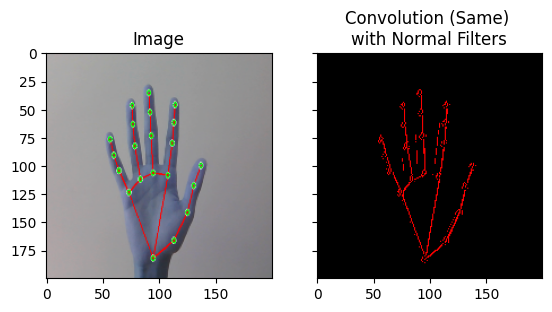

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True)

ax[0].imshow(image)
ax[0].title.set_text('Image')
ax[1].imshow(convolution)
ax[1].title.set_text('Convolution (Same) \nwith Normal Filters')

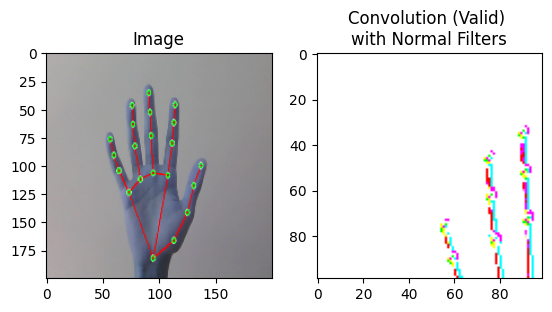

In [ ]:
image = cv2.imread('/content/1_clagIwqV2gdz-UoAcpOKAg.png')
image = cv2.resize(image, (200,200))
node = convolution_node(kernel_size=(3,3), strides=1, padding='valid')
convolution = node(image)

fig, ax = plt.subplots(1,2, sharey=False)

ax[0].imshow(image)
ax[0].title.set_text('Image')
ax[1].imshow(convolution)
ax[1].title.set_text('Convolution (Valid) \nwith Normal Filters')